In [2]:
import numpy as np
!pip3 install statsmodels
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import matplotlib.pyplot as plt

In [18]:
pfizer = np.loadtxt('/Users/sanyaarya/Downloads/rishisanya/data120/pfizer.txt')
flora = np.loadtxt('/Users/sanyaarya/Downloads/rishisanya/data120/flora_growth_corporated.txt')
jnj = np.loadtxt('/Users/sanyaarya/Downloads/rishisanya/data120/johnson_and_johnson.txt')
biorest = np.loadtxt('/Users/sanyaarya/Downloads/rishisanya/data120/biorestorative_therapies.txt')
silo = np.loadtxt('/Users/sanyaarya/Downloads/rishisanya/data120/silo_pharma.txt')
abbvie = np.loadtxt('/Users/sanyaarya/Downloads/rishisanya/data120/abbvie.txt')
small_companies = [flora, biorest, silo]
large_companies = [pfizer, jnj, abbvie]

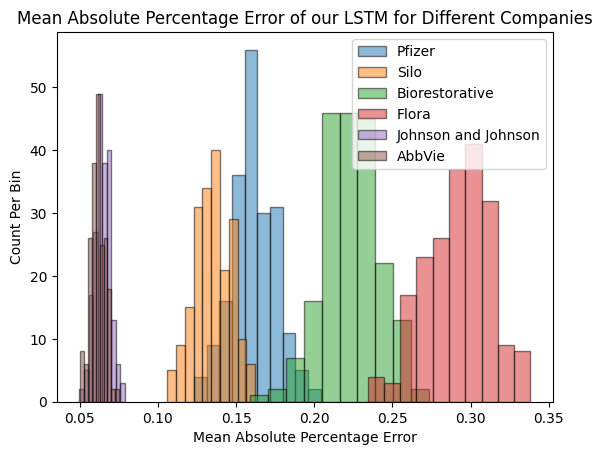

In [40]:
plt.hist(pfizer, edgecolor = 'black', alpha = 0.5, label = 'Pfizer')
plt.title('Mean Absolute Percentage Error of our LSTM for Different Companies')
plt.ylabel('Count Per Bin');
plt.xlabel('Mean Absolute Percentage Error');
plt.hist(silo, edgecolor = 'black', alpha = 0.5, label = 'Silo')
plt.hist(biorest, edgecolor = 'black', alpha = 0.5, label = 'Biorestorative')
plt.hist(flora, edgecolor = 'black', alpha = 0.5, label = 'Flora')
plt.hist(jnj, edgecolor = 'black', alpha = 0.5, label = 'Johnson and Johnson')
plt.hist(abbvie, edgecolor = 'black', alpha = 0.5, label = 'AbbVie')
plt.legend()

In [41]:
from statsmodels.stats.weightstats import ttest_ind
test_stat, p_value, df = ttest_ind(x1 = pfizer, x2 = flora, alternative = 'smaller', usevar='unequal')

In [42]:
p_value

np.float64(2.8677753452061424e-215)

In [43]:
p_values=[]
for small_company in small_companies:
    for large_company in large_companies:
        test_stat, p_value, df = ttest_ind(x1 = large_company, x2 = small_company, alternative = 'smaller', usevar='unequal')
        p_values.append(p_value)

In [44]:
p_values

[np.float64(2.8677753452061424e-215),
 np.float64(3.7368730056185896e-225),
 np.float64(9.82278502926355e-225),
 np.float64(3.0933332259042886e-133),
 np.float64(1.008953406302527e-208),
 np.float64(1.108392213276864e-208),
 np.float64(1.0),
 np.float64(1.0120571919211366e-187),
 np.float64(1.004492675279726e-189)]